<a href="https://colab.research.google.com/github/Sindhu846/eda-capestone-project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#mounting drive.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#importing libraries required to perform EDA.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [ ]:
#Reading and storing a data to a variable.
hotel_booking_df=pd.read_csv('/content/drive/MyDrive/data folder/Hotel Bookings.csv')

## **DATASET** **ANALYSIS** 



In [ ]:
#Displaying first 5 rows 
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Details of no of columns and rows.
hotel_booking_df.shape

(119390, 32)

In [ ]:
#Displaying column names.
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#information of columns.
hotel_booking_df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [ ]:
#Data type of each column.
hotel_booking_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**CLASSIFYING DATA INTO NUMERICAL AND CATEGORICAL DATA**

In [ ]:
#Numerical data.
hotel_booking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#Categorical Data.
hotel_booking_df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


## **DATA** **CLEANING**

Most important step before doing any exploratory data analysis is data cleaning to get the most effective results.
some of the steps that can be done in data cleaning are as follows:
1.To remove missing values.
2.Replace the null/NaN values.
3.Removing of unnecessary rows/columns.

**1.Dealing with missing values**.

In [ ]:
#no of missing values in each column.
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#replacing null values in country and agent clumn with 0.
hotel_booking_df["agent"] = hotel_booking_df["agent"].fillna(0)
hotel_booking_df["company"] = hotel_booking_df["company"].fillna(0)
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#replacing missing values in country column with the mode of country column.
hotel_booking_df['country'].fillna('others', inplace = True)

In [ ]:
#replacing missing values in children column with mean of that column.
hotel_booking_df['children'].fillna(hotel_booking_df['children'].mean(), inplace = True)

**2.Removing of unnecessary columns and rows.**

In [ ]:
#checking for duplicate rows.
hotel_booking_df[hotel_booking_df.duplicated()].shape

(31994, 32)

In [ ]:
#removing duplicate rows.
hotel_booking_df.drop_duplicates(inplace = True)

In [ ]:
#some rows have zero values in adults, children and babies columns.
#checking for such rows.
hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children'] == 0].shape

(166, 32)

In [ ]:
#Dropping of such rows.
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children'] == 0].index, inplace = True)

**3.Converting some of the columns datatype.**

In [ ]:
#checking each column datatype.
hotel_booking_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#Datatype of children,agent and company if float64, converting that to int64.
hotel_booking_df[['children', 'company', 'agent']] = hotel_booking_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
#reservation_status_date column datatype is changed to data_type.
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'], format = '%Y-%m-%d')

## **DATA VISUALIZATION**

**1.UNIVARIATE ANALYSIS**

1)which month the hotel received more bookings?

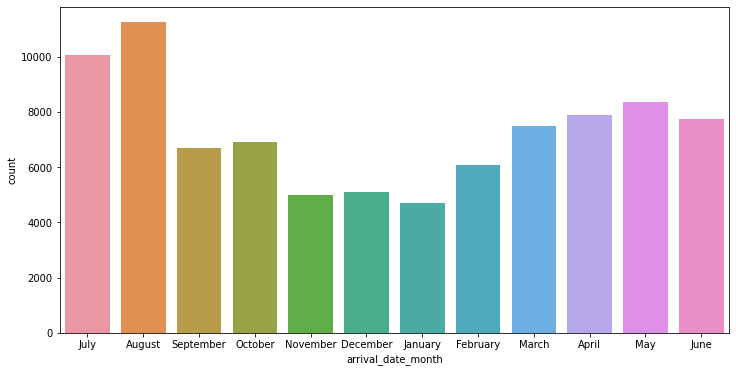

In [ ]:
plt.figure( figsize=(12, 6))

sns.countplot(x = hotel_booking_df['arrival_date_month'])
plt.show()

The arrival of guests is more in August and july.

02)which company and agent makes more no. of bookings with this hotel?

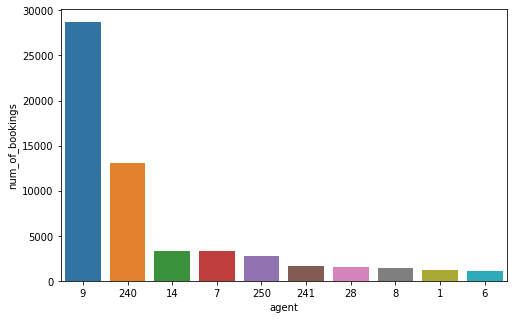

In [ ]:
agent_df = pd.DataFrame(hotel_booking_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)            
agent_df = agent_df[:10]                                                  
plt.figure(figsize = (8,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings', ascending = False).agent)

The most no. of bookings is made by agent 9.

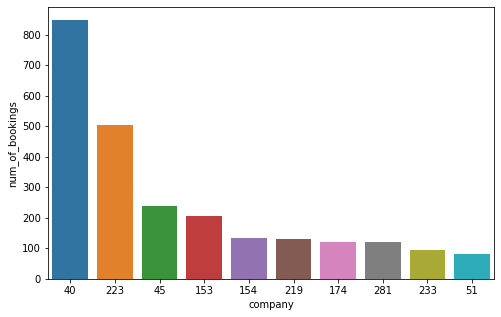

In [ ]:
company_df = pd.DataFrame(hotel_booking_df['company'].value_counts()).reset_index().rename(columns = {'index':'company','company':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
company_df.drop(company_df[company_df['company'] == 0].index, inplace = True)            
company_df = company_df[:10]                                                  
plt.figure(figsize = (8,5))
sns.barplot(x = 'company', y = 'num_of_bookings', data = company_df, order = company_df.sort_values('num_of_bookings', ascending = False).company)

The most bookings is made by company 40.

03)Which meal is most ordered by guests?

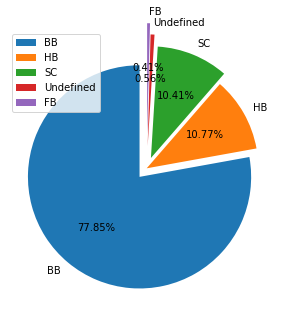

In [ ]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = hotel_booking_df.meal.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.3), autopct = "%.2f%%",startangle = 90)

plt.legend()

plt.show();

BB(Bread and Breakfast) is the most ordered meal.

04)From which country more no of customers made bookings?

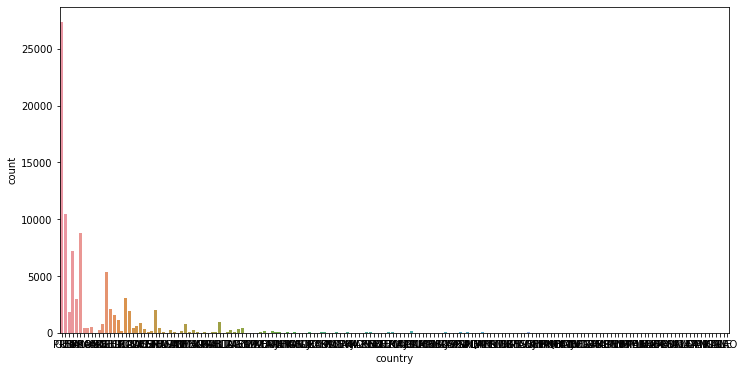

In [ ]:
plt.figure( figsize=(12, 6))

sns.countplot(x = hotel_booking_df['country'])
plt.show()

05)Which type of customers are more?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


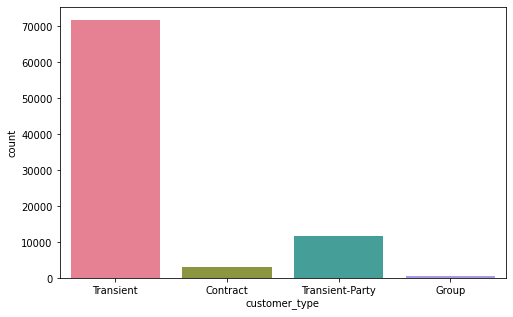

In [ ]:
hotel_booking_df.customer_type.value_counts(normalize=True)
plt.figure(figsize=(8,5))
sns.countplot(hotel_booking_df['customer_type'], palette='husl')
plt.show()

The transient type of customers are more where they are not included with any contract or group.

## **2.COMPARISION BETWEEN TWO HOTELS**

01)How many guests arrived yearwise and hotelwise?

In [ ]:
hotel_booking_df.groupby(["hotel"])["arrival_date_year"].agg(["value_counts"])

value_counts
hotel        arrival_date_year              
City Hotel   2016                      26684
             2017                      20064
             2015                       6526
Resort Hotel 2016                      15629
             2017                      11569
             2015                       6758

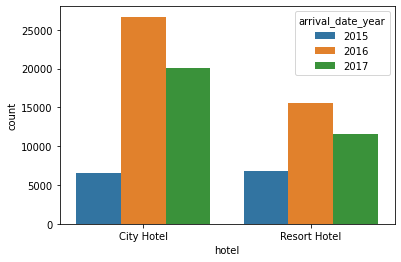

In [ ]:
sns.countplot(x = "hotel", hue = "arrival_date_year", data = hotel_booking_df, order = ["City Hotel", "Resort Hotel"]);

In [ ]:
hotel_booking_df.hotel.agg(["value_counts"])

,value_counts
City Hotel,53274
Resort Hotel,33956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


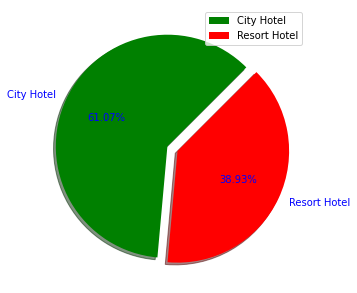

In [ ]:
hotel = ["City Hotel", "Resort Hotel"]
booking = hotel_booking_df.hotel.value_counts()
color = ["G", "R"]

plt.figure(figsize = (5, 7))
plt.pie(booking, labels = hotel, colors = color, explode = (0, 0.1), textprops = {'color':"b"}, autopct = "%.2f%%", shadow = True, startangle = 45)

plt.legend()

plt.show();

City hotel has 60% of bookings and resort hotel has 40% of bookings.
City hotel has more no. of bookings compared to resort hotel. In both hotels year 2016 has highest no. of bookings.

02)Which hotel has more adr?

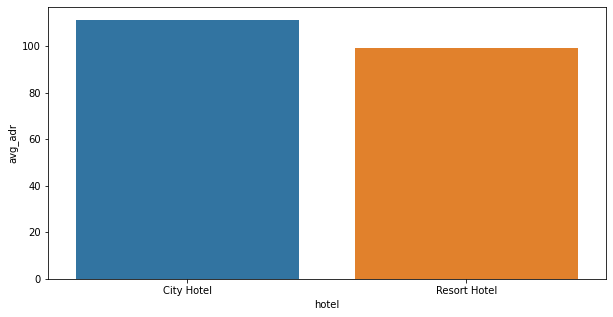

In [ ]:
city_resort_grp=hotel_booking_df.groupby('hotel')
adr_df = city_resort_grp['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (10,5))
sns.barplot(x = adr_df['hotel'], y = adr_df['avg_adr'] )
plt.show()

City hotel is having more average daily ratio.

03)Which hotel has more likely to make the customer in waiting list before confirming?

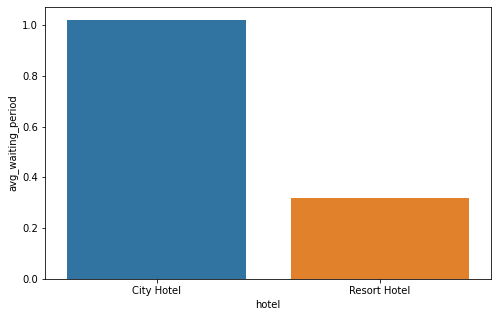

In [ ]:
wait_list = pd.DataFrame(city_resort_grp['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = wait_list['hotel'], y = wait_list['avg_waiting_period'] )
plt.show()

City hotel has more chances of putting it's customer in waiting list.

## **3.CANCELLATION ANALYSIS**

01)Which hotel has more cancellations?

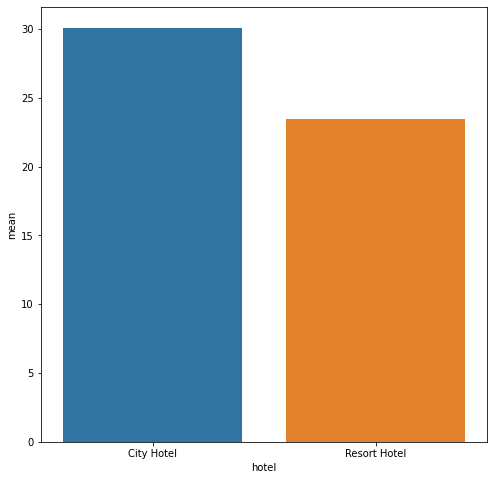

In [ ]:
cancel_df = hotel_booking_df.groupby("hotel")['is_canceled'].describe()
plt.figure(figsize = (8,8))
sns.barplot(x=cancel_df.index, y=cancel_df["mean"] * 100)

Cancellations are made more in city hotel.

02) Which distribution channel has made more cancellation?

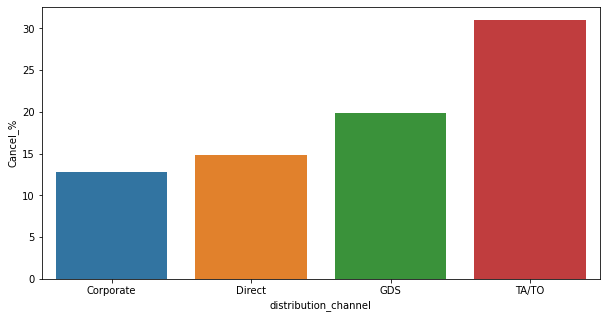

In [ ]:
group_by_dist_chan = hotel_booking_df.groupby('distribution_channel')
Dis_cancel = pd.DataFrame((group_by_dist_chan['is_canceled'].sum()/group_by_dist_chan.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x =Dis_cancel.index, y = Dis_cancel['Cancel_%'])
plt.show()

TA/TO has made more cancellations.

In [ ]:
hotel_booking_df.groupby(["hotel"])["reservation_status"].agg(["value_counts"])

value_counts
hotel        reservation_status              
City Hotel   Check-Out                  37239
             Canceled                   15288
             No-Show                      747
Resort Hotel Check-Out                  25982
             Canceled                    7708
             No-Show                      266

## **4.MONTH AND TIME ANALYSIS**